In [1]:
import sys
sys.path.insert(1, '../../src')

from plot_trec_eval import plot_pr_curve

import pandas as pd
import json

import matplotlib.pyplot as plt
%matplotlib inline

# Redflag Results Table

In [2]:
df = pd.read_csv('overview.csv')

In [3]:
df.loc[df.groupby('model_name')['map'].idxmax()][['model_name', 'runid', 'map', 'iprec_at_recall_0.80']].sort_values('map')               

,model_name,runid,map,iprec_at_recall_0.80
41,Easy_PT_Scratch,EPOCH 002,0.484371,0.262187
27,Easy_Albert_Base_V2_Extended,EPOCH 012,0.487392,0.253503
50,"Pipeline(steps=[('tfidf',\n Tf...",0.0,0.499220,0.266043
2,Easy_Albert_Base_V2,EPOCH 006,0.522737,0.252859
36,Easy_Add_PT,EPOCH 002,0.573311,0.357914


# Redflag PR Curves

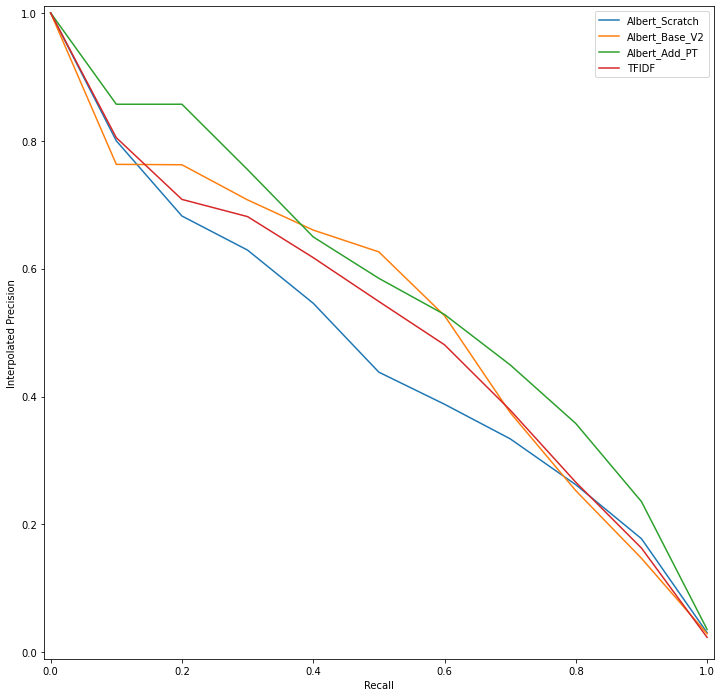

In [5]:
models = {
    'Albert_Scratch': 'Easy_PT_Scratch_002.json', 
    'Albert_Base_V2': 'Easy_Albert_Base_V2_006.json',
    'Albert_Add_PT': 'Easy_Add_PT_002.json',
    'TFIDF': 'ml_results.json'
}

results = {k: json.load(open(v)) for k, v in models.items()}

for k in results:
    if k.startswith('Albert'):
        results[k] = results[k]['redflag']
    results[k]['runid'] = k

f = plot_pr_curve.process(list_results=results.values())
f.set_size_inches(12, 12, forward=True)
plt.show()
f.savefig('PR_Curves.pdf')

# NER

In [6]:
models = {
    'Albert_Add_PT': 'NER_Albert_AddPT_paper_report.csv',
    'CRF': 'NER_CRF_paper_report.csv'
}

results = {k: pd.read_csv(v) for k, v in models.items()}

for k in results:
    results[k]['model'] = k


In [7]:
ner_df = pd.concat(results.values(), ignore_index=True)

ner_df['entity'] = ner_df['Unnamed: 0']
ner_df = ner_df.drop(columns=['Unnamed: 0'])
ner_df = ner_df[~ner_df['entity'].isin(['macro avg', 'weighted avg'])]

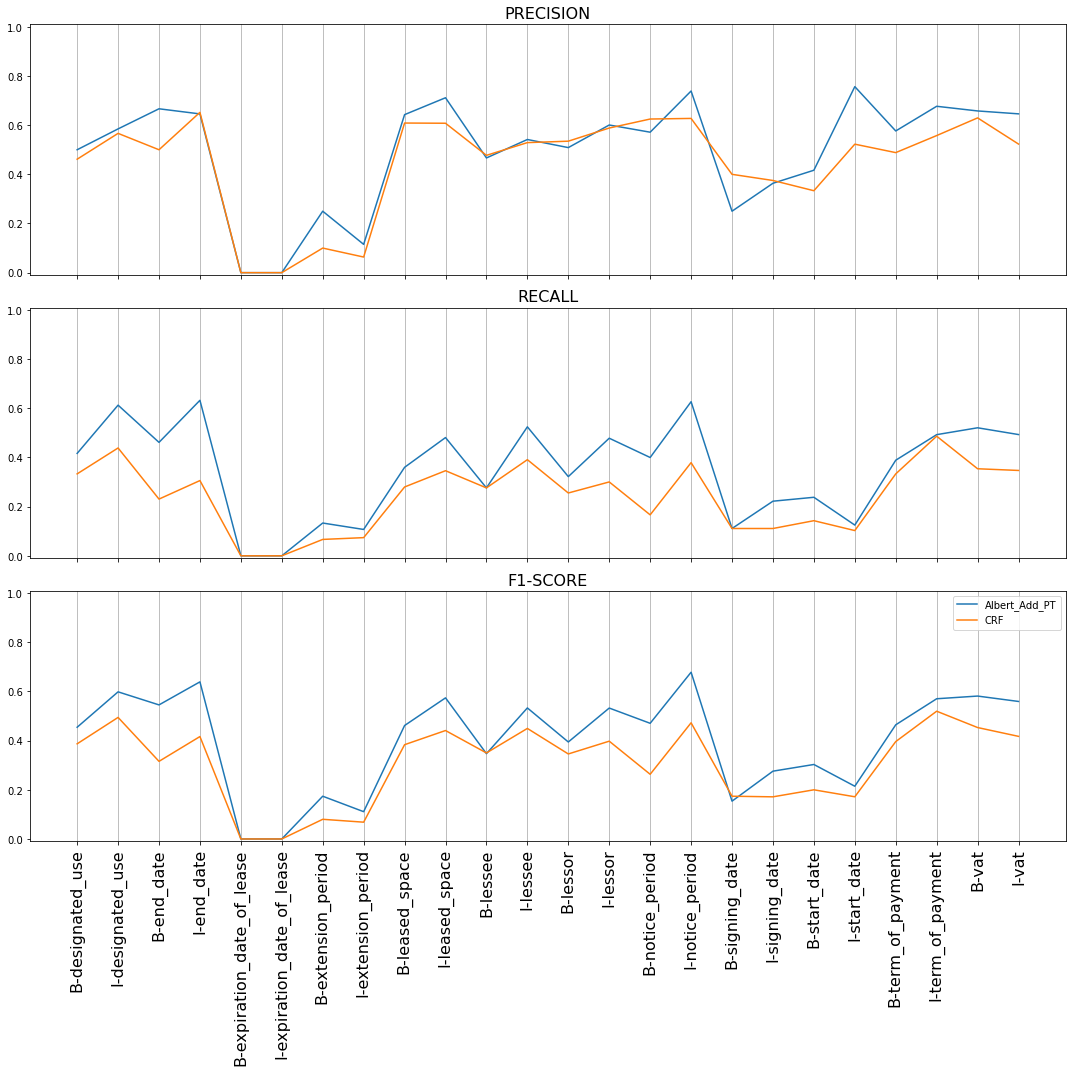

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

for ax, metric in zip(axs, ('precision', 'recall', 'f1-score')):
    df_x = ner_df[['entity', 'model', metric]]
    for model in df_x['model'].unique():
        df_xx = df_x[df_x['model'] == model]
        _ = ax.plot(df_xx['entity'], df_xx[metric], label=model, )
        _ = ax.set_ylim((-0.01, 1.01))
    _ = ax.title.set_text(metric.upper())
    _ = ax.title.set_fontsize(16)
    _ = ax.xaxis.grid(True)
_ = plt.xticks(ner_df['entity'].unique(), rotation=90, fontsize=16)
_ = plt.legend()
_ = plt.tight_layout()

fig.savefig('NER_Report.pdf')

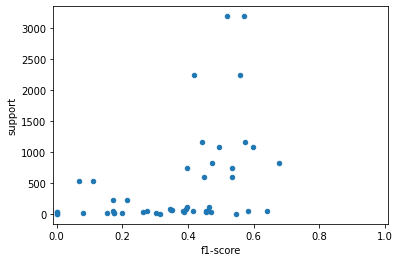

In [74]:
_ = ner_df.plot.scatter('f1-score', 'support', xlim=(-0.01, 1.01))